In [13]:
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
#from keras.metrics import Precision, Recall, F1Score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def train_and_evaluate(epochs, batch_size, validation_split):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Se obtiene una muestra con igual número de: cincos vs no cincos
    # para el conjunto de entrenamiento y el de test
    idx_y_train_5 = np.where(y_train == 5)[0]
    idx_y_train_n5 = np.where(y_train != 5)[0]
    idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)

    idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
    np.random.shuffle(idx_y_train)

    x_train = x_train[idx_y_train]
    y_train = y_train[idx_y_train]

    idx_y_test_5 = np.where(y_test == 5)[0]
    idx_y_test_n5 = np.where(y_test != 5)[0]
    idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

    idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
    np.random.shuffle(idx_y_test)

    x_test = x_test[idx_y_test]
    y_test = y_test[idx_y_test]

    y_train_binary = (y_train == 5).astype(int)
    y_test_binary = (y_test == 5).astype(int)

    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(1)
    ])

    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train_binary, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

    precision_1 = precision_score(y_test_binary, y_pred)
    #print("Precision_1:", precision)
    recall_1 = recall_score(y_test_binary, y_pred)
    #print("Recall_1:", recall)
    f1_s_1 = f1_score(y_test_binary, y_pred)
    #print("F1-score_1:", f1_s)

    precision_0 = precision_score(y_test_binary, y_pred, pos_label=0)
    #print("Precision_0:", precision_0)
    recall_0 = recall_score(y_test_binary, y_pred, pos_label=0)
    #print("Recall_0:", recall_0)
    f1_s_0 = f1_score(y_test_binary, y_pred, pos_label=0)
    #print("F1-score_0:", f1_s_0)

    accuracy = model.evaluate(x_test, y_test_binary)[1]
    #print("Accuracy:", accuracy)

    return accuracy, precision_1, recall_1, f1_s_1, precision_0, recall_0, f1_s_0, y_test_binary, y_pred

def print_means(results, n):
    averages = np.mean(results, axis=0)
    print("Situación", n,"- Promedios:")
    print("Accuracy:", averages[0])
    print("Precision_1:", averages[1])
    print("Recall_1:", averages[2])
    print("F1-score_1:", averages[3])
    print("Precision_0:", averages[4])
    print("Recall_0:", averages[5])
    print("F1-score_0:", averages[6])


In [9]:

# Situación 1
epochs_1, batch_size_1, validation_split_1 = 4, 2000, 0.9
results_1 = [train_and_evaluate(epochs_1, batch_size_1, validation_split_1) for _ in range(5)]
print_means(results_1, '1')

# Situación 2
epochs_2, batch_size_2, validation_split_2 = 20, 2000, 0.9
results_2 = [train_and_evaluate(epochs_2, batch_size_2, validation_split_2) for _ in range(5)]
print_means(results_2, '2')

# Situación 3
epochs_3, batch_size_3, validation_split_3 = 4, 2, 0.9
results_3 = [train_and_evaluate(epochs_3, batch_size_3, validation_split_3) for _ in range(5)]
print_means(results_3, '3')

# Situación 4
epochs_4, batch_size_4, validation_split_4 = 4, 2000, 0.01
results_4 = [train_and_evaluate(epochs_4, batch_size_4, validation_split_4) for _ in range(5)]
print_means(results_4, '4')




Epoch 1/4
1/1 [==============================] - 0s 241ms/step - loss: 7.8474 - accuracy: 0.4908 - val_loss: 7.5636 - val_accuracy: 0.5083
Epoch 2/4
1/1 [==============================] - 0s 24ms/step - loss: 7.9424 - accuracy: 0.4843 - val_loss: 7.5384 - val_accuracy: 0.5109
Epoch 3/4
1/1 [==============================] - 0s 26ms/step - loss: 7.5262 - accuracy: 0.5120 - val_loss: 7.4293 - val_accuracy: 0.5174
Epoch 4/4
56/56 [==============================] - 0s 318us/step - loss: 7.2704 - accuracy: 0.5269
Epoch 1/4
1/1 [==============================] - 0s 361ms/step - loss: 7.6741 - accuracy: 0.4991 - val_loss: 7.5435 - val_accuracy: 0.5053
Epoch 2/4
1/1 [==============================] - 0s 28ms/step - loss: 7.2147 - accuracy: 0.5268 - val_loss: 7.1824 - val_accuracy: 0.5296
Epoch 3/4
1/1 [==============================] - 0s 27ms/step - loss: 6.9037 - accuracy: 0.5452 - val_loss: 7.2059 - val_accuracy: 0.5266
Epoch 4/4
56/56 [==============================] - 0s 351us/step - loss

Epoch 1/4
1/1 [==============================] - 0s 267ms/step - loss: 7.4341 - accuracy: 0.5166 - val_loss: 7.7619 - val_accuracy: 0.4951
Epoch 2/4
1/1 [==============================] - 0s 22ms/step - loss: 7.5621 - accuracy: 0.5092 - val_loss: 7.7619 - val_accuracy: 0.4951
Epoch 3/4
1/1 [==============================] - 0s 20ms/step - loss: 7.5621 - accuracy: 0.5092 - val_loss: 7.7619 - val_accuracy: 0.4951
Epoch 4/4
56/56 [==============================] - 0s 347us/step - loss: 7.6950 - accuracy: 0.4994


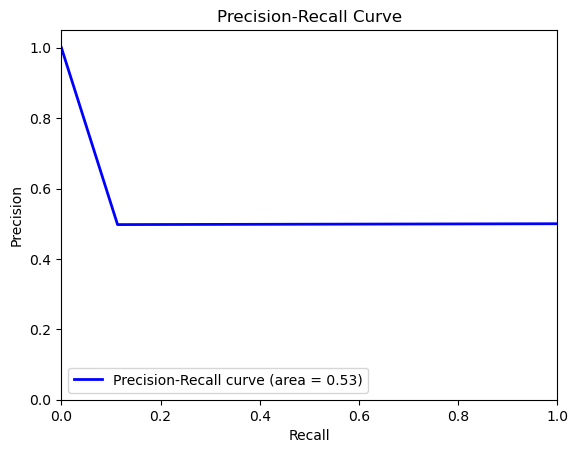

In [17]:
#Optimización de las métricas

from sklearn.metrics import  auc, precision_recall_curve

def precision_recall_auc(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    return precision, recall, pr_auc


epochs1, batch_size1, validation_split1 = 4, 2000, 0.9
results1 = train_and_evaluate(epochs1, batch_size1, validation_split1)

fpr, tpr, roc_auc = roc_curve_auc(results1[7], results1[8])
precision, recall, pr_auc = precision_recall_auc(results1[7], results1[8])

import matplotlib.pyplot as plt

# Graficamos la curva PR
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()